In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

##  데이터 확인 CNC - 전력데이터

In [3]:
cnc_df = pd.read_csv('CNC - 전력데이터, 2021-01-29 00;00;00 _ 2021-04-12 23;59;59 (1).csv')
cnc_df

,Time,유효전력량,유효전력,평균전압,A상 전압,B상 전압,C상 전압,평균전류,A상 전류,B상 전류,C상 전류,무효전력,무효전력량,주파수,역률
0,2021-01-29 00:00:00,3576.8000,3.744,399.8850,400.4554,398.1217,401.9159,6.3750,6.2430,6.6387,6.2672,-1.424,1667.5000,60.0121,74.9904
1,2021-01-29 00:15:00,3578.1001,4.672,397.4947,399.7785,395.5103,397.3134,7.2500,7.3123,7.0332,7.4344,-1.376,1667.9000,60.0000,88.8986
2,2021-01-29 00:30:00,3579.2000,4.768,397.3534,396.6052,394.3286,396.2250,7.9375,7.9558,7.8102,8.0113,-1.336,1668.2000,60.0000,91.6537
3,2021-01-29 00:45:00,3580.3999,5.536,399.1072,400.3101,399.9597,399.7557,8.3750,8.2522,8.5582,8.3136,-1.536,1668.7000,60.0000,92.5780
4,2021-01-29 01:00:00,3581.6001,4.608,396.9487,398.3242,396.2550,399.9652,7.4375,7.4713,7.3462,7.5644,-1.608,1669.1000,60.0000,88.0604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7099,2021-04-12 22:45:00,7838.7002,4.192,396.7566,397.2610,394.1853,396.2719,6.5000,6.8436,5.3526,7.5911,-1.160,3933.2000,60.0000,84.9602
7100,2021-04-12 23:00:00,7839.7998,4.480,393.4709,394.4301,392.8890,393.3068,6.7813,7.2922,5.7264,8.0334,-1.104,3933.5000,59.8273,85.2556
7101,2021-04-12 23:15:00,7840.7998,4.256,394.8384,396.4203,394.7697,395.2326,6.7188,7.0228,5.4660,7.6914,-1.104,3933.8999,59.7500,84.2658
7102,2021-04-12 23:30:00,7841.7998,4.832,399.1934,399.3683,397.9555,396.1529,8.2500,7.9906,6.4948,9.4033,-0.988,3934.3000,60.1856,84.2706


##  데이터 확인 CNC - 가동정보

In [4]:
cnc_if = pd.read_csv('CNC - 가동정보, 2021-01-29 00;00;00 _ 2021-04-12 23;59;59.csv')
cnc_if

,Time,가동정보
0,2021-01-29 1:14,2
1,2021-01-29 1:14,0
2,2021-01-29 1:15,1
3,2021-01-29 1:15,2
4,2021-01-29 1:15,0
...,...,...
15224,2021-04-12 23:56,1
15225,2021-04-12 23:58,2
15226,2021-04-12 23:58,1
15227,2021-04-12 23:59,2


In [5]:
cnc_if.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15229 entries, 0 to 15228
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Time    15229 non-null  object
 1    가동정보   15229 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 238.1+ KB


# 역률이 90이 넘는 데이터 확인

In [6]:
cnc_df_normal = cnc_df[cnc_df[' 역률'] > 90]
cnc_df_normal

,Time,유효전력량,유효전력,평균전압,A상 전압,B상 전압,C상 전압,평균전류,A상 전류,B상 전류,C상 전류,무효전력,무효전력량,주파수,역률
2,2021-01-29 00:30:00,3579.2000,4.768,397.3534,396.6052,394.3286,396.2250,7.9375,7.9558,7.8102,8.0113,-1.336,1668.2000,60.0000,91.6537
3,2021-01-29 00:45:00,3580.3999,5.536,399.1072,400.3101,399.9597,399.7557,8.3750,8.2522,8.5582,8.3136,-1.536,1668.7000,60.0000,92.5780
8,2021-01-29 02:00:00,3586.2000,4.768,395.0005,396.5448,394.1891,397.9750,7.7813,7.8239,7.6196,7.9174,-1.352,1670.6000,60.0000,91.9636
9,2021-01-29 02:15:00,3587.3000,5.440,395.0130,397.7661,393.7445,395.4183,9.4375,9.6135,9.1525,9.7177,-1.280,1671.0000,60.0000,92.4654
13,2021-01-29 03:15:00,3591.3000,5.216,394.1549,397.1011,393.2865,394.8482,7.4375,7.4316,7.5261,7.3807,-1.544,1672.9000,59.7500,92.2733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7062,2021-04-12 13:30:00,7803.6001,4.704,384.3479,386.6642,385.2710,385.4802,7.9688,8.0530,7.6988,7.8478,-1.104,3918.6001,59.7500,92.2398
7065,2021-04-12 14:15:00,7806.8999,4.512,382.2081,382.3383,382.8273,383.0337,7.4063,7.2809,7.4972,6.7916,-1.160,3919.5000,60.0000,90.6678
7069,2021-04-12 15:15:00,7809.1001,4.320,384.6499,384.0428,384.3944,384.6949,6.9375,6.9983,6.7741,7.1593,-1.048,3922.1001,59.7500,90.6663
7080,2021-04-12 18:00:00,7818.7998,4.864,387.3950,388.7150,386.7716,387.3618,7.7813,7.4834,8.0778,7.7881,-1.144,3927.1001,59.8153,91.7469


In [7]:
# ddf = pd.merge(cnc_df, cnc_if, on='Time', how='inner')
# ddf

In [8]:
cnc_df['Time'].iloc[:13]

0     2021-01-29 00:00:00
1     2021-01-29 00:15:00
2     2021-01-29 00:30:00
3     2021-01-29 00:45:00
4     2021-01-29 01:00:00
5     2021-01-29 01:15:00
6     2021-01-29 01:30:00
7     2021-01-29 01:45:00
8     2021-01-29 02:00:00
9     2021-01-29 02:15:00
10    2021-01-29 02:30:00
11    2021-01-29 02:45:00
12    2021-01-29 03:00:00
Name: Time, dtype: object

In [9]:
cnc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7104 entries, 0 to 7103
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    7104 non-null   object 
 1    유효전력량  7104 non-null   float64
 2    유효전력   7104 non-null   float64
 3    평균전압   7104 non-null   float64
 4    A상 전압  7104 non-null   float64
 5    B상 전압  7104 non-null   float64
 6    C상 전압  7104 non-null   float64
 7    평균전류   7104 non-null   float64
 8    A상 전류  7104 non-null   float64
 9    B상 전류  7104 non-null   float64
 10   C상 전류  7104 non-null   float64
 11   무효전력   7104 non-null   float64
 12   무효전력량  7104 non-null   float64
 13   주파수    7104 non-null   float64
 14   역률     7104 non-null   float64
dtypes: float64(14), object(1)
memory usage: 832.6+ KB


# 두 파일의 시간데이터 기준으로 결합

In [10]:
timelist = cnc_df. Time.str[:16].tolist()
timelist

['2021-01-29 00:00',
 '2021-01-29 00:15',
 '2021-01-29 00:30',
 '2021-01-29 00:45',
 '2021-01-29 01:00',
 '2021-01-29 01:15',
 '2021-01-29 01:30',
 '2021-01-29 01:45',
 '2021-01-29 02:00',
 '2021-01-29 02:15',
 '2021-01-29 02:30',
 '2021-01-29 02:45',
 '2021-01-29 03:00',
 '2021-01-29 03:15',
 '2021-01-29 03:30',
 '2021-01-29 03:45',
 '2021-01-29 04:00',
 '2021-01-29 04:15',
 '2021-01-29 04:30',
 '2021-01-29 04:45',
 '2021-01-29 05:00',
 '2021-01-29 05:15',
 '2021-01-29 05:30',
 '2021-01-29 05:45',
 '2021-01-29 06:00',
 '2021-01-29 06:15',
 '2021-01-29 06:30',
 '2021-01-29 06:45',
 '2021-01-29 07:00',
 '2021-01-29 07:15',
 '2021-01-29 07:30',
 '2021-01-29 07:45',
 '2021-01-29 08:00',
 '2021-01-29 08:15',
 '2021-01-29 08:30',
 '2021-01-29 08:45',
 '2021-01-29 09:00',
 '2021-01-29 09:15',
 '2021-01-29 09:30',
 '2021-01-29 09:45',
 '2021-01-29 10:00',
 '2021-01-29 10:15',
 '2021-01-29 10:30',
 '2021-01-29 10:45',
 '2021-01-29 11:00',
 '2021-01-29 11:15',
 '2021-01-29 11:30',
 '2021-01-29 

In [11]:
cnc_df = cnc_df.drop(['Time'], axis = 1)

In [12]:
cnc_df['Time'] = timelist

In [13]:
cnc_df

,유효전력량,유효전력,평균전압,A상 전압,B상 전압,C상 전압,평균전류,A상 전류,B상 전류,C상 전류,무효전력,무효전력량,주파수,역률,Time
0,3576.8000,3.744,399.8850,400.4554,398.1217,401.9159,6.3750,6.2430,6.6387,6.2672,-1.424,1667.5000,60.0121,74.9904,2021-01-29 00:00
1,3578.1001,4.672,397.4947,399.7785,395.5103,397.3134,7.2500,7.3123,7.0332,7.4344,-1.376,1667.9000,60.0000,88.8986,2021-01-29 00:15
2,3579.2000,4.768,397.3534,396.6052,394.3286,396.2250,7.9375,7.9558,7.8102,8.0113,-1.336,1668.2000,60.0000,91.6537,2021-01-29 00:30
3,3580.3999,5.536,399.1072,400.3101,399.9597,399.7557,8.3750,8.2522,8.5582,8.3136,-1.536,1668.7000,60.0000,92.5780,2021-01-29 00:45
4,3581.6001,4.608,396.9487,398.3242,396.2550,399.9652,7.4375,7.4713,7.3462,7.5644,-1.608,1669.1000,60.0000,88.0604,2021-01-29 01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7099,7838.7002,4.192,396.7566,397.2610,394.1853,396.2719,6.5000,6.8436,5.3526,7.5911,-1.160,3933.2000,60.0000,84.9602,2021-04-12 22:45
7100,7839.7998,4.480,393.4709,394.4301,392.8890,393.3068,6.7813,7.2922,5.7264,8.0334,-1.104,3933.5000,59.8273,85.2556,2021-04-12 23:00
7101,7840.7998,4.256,394.8384,396.4203,394.7697,395.2326,6.7188,7.0228,5.4660,7.6914,-1.104,3933.8999,59.7500,84.2658,2021-04-12 23:15
7102,7841.7998,4.832,399.1934,399.3683,397.9555,396.1529,8.2500,7.9906,6.4948,9.4033,-0.988,3934.3000,60.1856,84.2706,2021-04-12 23:30


In [14]:
df = pd.merge(cnc_df, cnc_if, on='Time', how='inner')
df

,유효전력량,유효전력,평균전압,A상 전압,B상 전압,C상 전압,평균전류,A상 전류,B상 전류,C상 전류,무효전력,무효전력량,주파수,역률,Time,가동정보
0,3645.8999,3.712,383.0131,384.1069,383.7635,383.5443,7.3438,7.8107,6.4319,7.8274,-1.672,1692.0000,60.0000,78.4390,2021-01-29 15:15,1
1,3650.6001,5.472,379.9483,381.9691,377.4947,379.3507,9.3125,9.0848,9.5962,9.2529,-1.296,1693.4000,59.7500,86.2309,2021-01-29 16:15,0
2,3650.6001,5.472,379.9483,381.9691,377.4947,379.3507,9.3125,9.0848,9.5962,9.2529,-1.296,1693.4000,59.7500,86.2309,2021-01-29 16:15,1
3,3655.3000,4.160,388.4655,391.3470,386.6907,388.7793,7.6250,7.8083,7.1990,7.9165,-1.768,1695.0000,59.7500,76.6392,2021-01-29 17:15,0
4,3680.6001,5.696,394.6171,395.7317,393.2461,394.9729,9.1250,9.3709,8.5793,9.4666,-1.520,1703.9000,60.0743,90.9466,2021-01-29 22:45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,7840.7998,4.256,394.8384,396.4203,394.7697,395.2326,6.7188,7.0228,5.4660,7.6914,-1.104,3933.8999,59.7500,84.2658,2021-04-12 23:15,1
699,7841.7998,4.832,399.1934,399.3683,397.9555,396.1529,8.2500,7.9906,6.4948,9.4033,-0.988,3934.3000,60.1856,84.2706,2021-04-12 23:30,2
700,7841.7998,4.832,399.1934,399.3683,397.9555,396.1529,8.2500,7.9906,6.4948,9.4033,-0.988,3934.3000,60.1856,84.2706,2021-04-12 23:30,1
701,7842.7998,3.872,395.2077,396.7956,395.5617,395.7938,6.2813,6.2798,6.2066,6.4005,-1.208,3934.6001,60.1432,90.0149,2021-04-12 23:45,2


In [15]:
# 가동정보에서 같은 시간을 줬을 때 어떻게 처리하는가
# 전력데이터는 15분간격 가동정보는 1~2분간격
#  -> 전력데이터 = 가동정보중에서 가장 마지막꺼 나오게 코드짜기

# 2월과 3월, 4월의 데이터 분석 및 비교(1월은 별로 없음)

# 5월 넷째주

In [16]:
df_feb = df
df_mar = df
df_apr = df

In [17]:
df_feb['Time'] = pd.to_datetime(df['Time'], format = '%Y-%m-%d %H:%M:%S', errors = 'raise')
df_mar['Time'] = pd.to_datetime(df['Time'], format = '%Y-%m-%d %H:%M:%S', errors = 'raise')
df_apr['Time'] = pd.to_datetime(df['Time'], format = '%Y-%m-%d %H:%M:%S', errors = 'raise')

In [18]:
df_feb = df_feb[df_feb['Time'].dt.month ==2]
df_mar = df_mar[df_mar['Time'].dt.month ==3]
df_apr = df_apr[df_apr['Time'].dt.month ==4]

In [19]:
df_feb

,유효전력량,유효전력,평균전압,A상 전압,B상 전압,C상 전압,평균전류,A상 전류,B상 전류,C상 전류,무효전력,무효전력량,주파수,역률,Time,가동정보
6,3776.3999,5.952,386.0307,388.7281,387.9287,387.7765,9.6875,9.8499,9.3212,9.9648,-1.072,1738.7,60.00,94.2147,2021-02-01 11:15:00,0
7,3799.3999,4.960,383.3945,384.1521,382.9072,383.0315,7.8125,7.7840,7.7335,7.9681,-1.576,1746.7,60.00,88.5820,2021-02-01 16:15:00,1
8,3811.1001,0.520,385.3047,386.5736,385.0243,385.2560,5.5000,5.6692,5.4615,5.4627,-3.344,1750.6,59.75,14.2472,2021-02-01 18:45:00,0
9,3811.1001,0.520,385.3047,386.5736,385.0243,385.2560,5.5000,5.6692,5.4615,5.4627,-3.344,1750.6,59.75,14.2472,2021-02-01 18:45:00,1
10,3826.1001,4.992,394.1570,394.5967,392.4120,394.0804,7.3750,7.3922,7.3631,7.4125,-1.328,1755.8,60.00,91.3854,2021-02-01 22:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,5604.2998,4.352,396.9157,398.4790,397.6238,397.6832,7.8750,7.7145,7.8273,7.9625,-2.704,2494.0,59.75,80.3324,2021-02-26 23:00:00,0
113,5604.2998,4.352,396.9157,398.4790,397.6238,397.6832,7.8750,7.7145,7.8273,7.9625,-2.704,2494.0,59.75,80.3324,2021-02-26 23:00:00,99
114,5604.2998,4.352,396.9157,398.4790,397.6238,397.6832,7.8750,7.7145,7.8273,7.9625,-2.704,2494.0,59.75,80.3324,2021-02-26 23:00:00,0
115,5604.2998,4.352,396.9157,398.4790,397.6238,397.6832,7.8750,7.7145,7.8273,7.9625,-2.704,2494.0,59.75,80.3324,2021-02-26 23:00:00,99


In [20]:
df_mar

,유효전력량,유효전력,평균전압,A상 전압,B상 전압,C상 전압,평균전류,A상 전류,B상 전류,C상 전류,무효전력,무효전력량,주파수,역률,Time,가동정보
117,5660.6001,0.964,383.2144,382.0242,382.0434,382.4319,5.7500,6.0066,5.7111,5.6349,-3.360,2520.0000,60.0000,24.7699,2021-03-02 14:00:00,1
118,5666.7002,5.856,380.6726,383.4521,381.8418,380.0883,8.5000,8.0705,9.1707,14.0557,-1.512,2521.8000,60.1432,87.7932,2021-03-02 15:15:00,0
119,5666.7002,5.856,380.6726,383.4521,381.8418,380.0883,8.5000,8.0705,9.1707,14.0557,-1.512,2521.8000,60.1432,87.7932,2021-03-02 15:15:00,1
120,5667.8999,4.048,383.4544,383.1775,381.8443,380.0511,7.4375,7.5989,7.1827,7.5998,-2.528,2522.2000,59.7500,80.9032,2021-03-02 15:30:00,2
121,5667.8999,4.048,383.4544,383.1775,381.8443,380.0511,7.4375,7.5989,7.1827,7.5998,-2.528,2522.2000,59.7500,80.9032,2021-03-02 15:30:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,7071.7998,3.984,402.9271,403.0836,400.0129,402.0594,6.4688,6.1759,6.9899,6.2772,-1.376,3506.8999,60.1432,77.0868,2021-03-27 10:00:00,1
319,7092.2998,1.616,398.1019,399.5914,396.5888,398.6422,5.5625,6.4892,4.9145,5.4116,-3.008,3514.8999,60.0000,39.2717,2021-03-27 15:00:00,1
320,7098.7002,0.420,386.3163,387.5647,384.3024,386.4390,5.8438,5.9873,5.8044,5.7549,-3.600,3529.1001,60.0773,10.8392,2021-03-29 10:30:00,99
321,7123.1001,1.024,399.9387,401.8751,396.7431,398.9048,5.4688,5.6602,5.4519,5.2845,-3.344,3557.3000,59.7500,27.6139,2021-03-31 21:30:00,1


In [21]:
df_apr

,유효전력량,유효전력,평균전압,A상 전압,B상 전압,C상 전압,평균전류,A상 전류,B상 전류,C상 전류,무효전력,무효전력량,주파수,역률,Time,가동정보
323,7181.2998,5.312,383.0673,384.5480,382.9171,383.1789,10.8125,11.2269,9.7931,11.4518,-1.096,3576.8000,59.7500,90.2695,2021-04-01 10:45:00,0
324,7202.0000,5.728,383.0896,384.7136,383.7762,383.7826,9.1250,8.4094,8.0900,8.6180,-1.264,3582.6001,60.0247,86.7284,2021-04-01 15:15:00,0
325,7211.2998,1.832,390.8241,391.3823,389.5243,388.2021,5.5313,6.6484,4.3251,5.6915,-2.816,3586.1001,60.0000,43.8812,2021-04-01 17:30:00,2
326,7211.2998,1.832,390.8241,391.3823,389.5243,388.2021,5.5313,6.6484,4.3251,5.6915,-2.816,3586.1001,60.0000,43.8812,2021-04-01 17:30:00,0
327,7218.7002,3.328,394.7811,396.2249,394.6504,395.1090,6.5000,6.4503,6.7299,6.3769,-2.528,3588.7000,60.0000,73.5072,2021-04-01 19:15:00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,7840.7998,4.256,394.8384,396.4203,394.7697,395.2326,6.7188,7.0228,5.4660,7.6914,-1.104,3933.8999,59.7500,84.2658,2021-04-12 23:15:00,1
699,7841.7998,4.832,399.1934,399.3683,397.9555,396.1529,8.2500,7.9906,6.4948,9.4033,-0.988,3934.3000,60.1856,84.2706,2021-04-12 23:30:00,2
700,7841.7998,4.832,399.1934,399.3683,397.9555,396.1529,8.2500,7.9906,6.4948,9.4033,-0.988,3934.3000,60.1856,84.2706,2021-04-12 23:30:00,1
701,7842.7998,3.872,395.2077,396.7956,395.5617,395.7938,6.2813,6.2798,6.2066,6.4005,-1.208,3934.6001,60.1432,90.0149,2021-04-12 23:45:00,2


In [22]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 2월의 전류

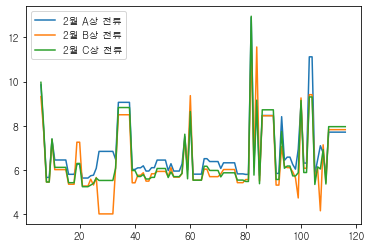

In [23]:
plt.plot(df_feb[[' A상 전류']], label = '2월 A상 전류')
plt.plot(df_feb[[' B상 전류']], label = '2월 B상 전류')
plt.plot(df_feb[[' C상 전류']], label = '2월 C상 전류')
plt.legend()

# 3월의 전류

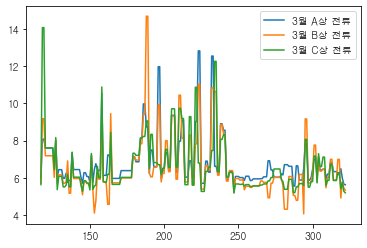

In [24]:
plt.plot(df_mar[[' A상 전류']], label = '3월 A상 전류')
plt.plot(df_mar[[' B상 전류']], label = '3월 B상 전류')
plt.plot(df_mar[[' C상 전류']], label = '3월 C상 전류')
plt.legend()

# 4월의 전류

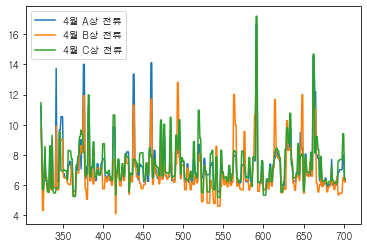

In [25]:
plt.plot(df_apr[[' A상 전류']], label = '4월 A상 전류')
plt.plot(df_apr[[' B상 전류']], label = '4월 B상 전류')
plt.plot(df_apr[[' C상 전류']], label = '4월 C상 전류')
plt.legend()

# 가동정보 수

<AxesSubplot:xlabel=' 가동정보', ylabel='count'>

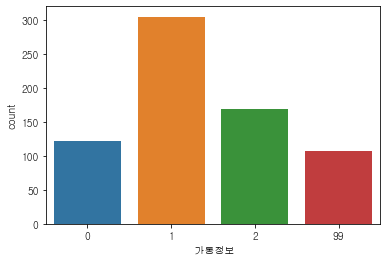

In [26]:
sns.countplot(x = df[' 가동정보'])

# 5/31

# 월별 역률 

In [27]:
feb_factor = df_feb[' 역률']
mar_factor = df_mar[' 역률']
apr_factor = df_apr[' 역률']

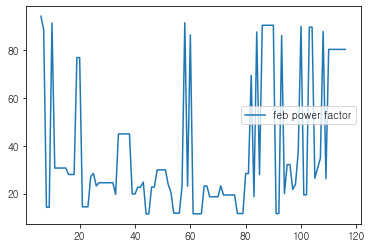

In [28]:
plt.plot(feb_factor, label = 'feb power factor')
plt.legend()

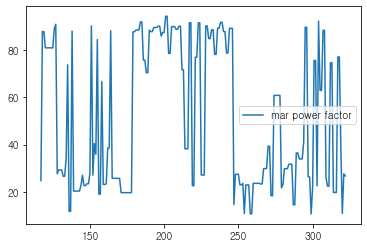

In [29]:
plt.plot(mar_factor, label = 'mar power factor')
plt.legend()

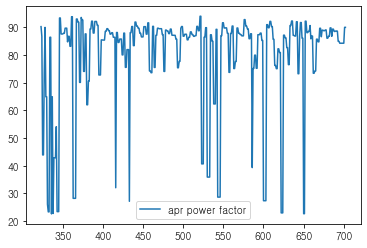

In [30]:
plt.plot(apr_factor, label = 'apr power factor')
plt.legend()

# 상관관계 분석

In [31]:
corr = df.corr(method = 'pearson')
corr

,유효전력량,유효전력,평균전압,A상 전압,B상 전압,C상 전압,평균전류,A상 전류,B상 전류,C상 전류,무효전력,무효전력량,주파수,역률,가동정보
유효전력량,1.000000,0.467092,0.137961,0.117505,0.153828,0.110323,0.154202,0.101138,0.113343,0.190003,0.569591,0.995336,0.117301,0.531856,0.099151
유효전력,0.467092,1.000000,-0.049216,-0.052401,-0.022357,-0.063766,0.653157,0.521049,0.611800,0.694335,0.938437,0.463984,-0.025753,0.941000,0.091369
평균전압,0.137961,-0.049216,1.000000,0.977480,0.971214,0.972876,-0.079154,-0.101192,-0.096405,-0.128305,-0.075227,0.150480,0.102319,-0.044114,0.046241
A상 전압,0.117505,-0.052401,0.977480,1.000000,0.967946,0.979315,-0.068059,-0.094634,-0.089279,-0.114813,-0.081701,0.129540,0.100990,-0.049530,0.041434
B상 전압,0.153828,-0.022357,0.971214,0.967946,1.000000,0.972847,-0.044154,-0.079403,-0.062241,-0.099136,-0.053132,0.165052,0.111523,-0.017699,0.042669
C상 전압,0.110323,-0.063766,0.972876,0.979315,0.972847,1.000000,-0.069751,-0.094683,-0.090345,-0.126832,-0.090981,0.123476,0.098256,-0.061594,0.040851
평균전류,0.154202,0.653157,-0.079154,-0.068059,-0.044154,-0.069751,1.000000,0.784290,0.825978,0.825631,0.490472,0.149895,-0.047515,0.479934,0.023961
A상 전류,0.101138,0.521049,-0.101192,-0.094634,-0.079403,-0.094683,0.784290,1.000000,0.780855,0.738794,0.383259,0.097253,-0.095984,0.363774,0.008589
B상 전류,0.113343,0.611800,-0.096405,-0.089279,-0.062241,-0.090345,0.825978,0.780855,1.000000,0.710466,0.461000,0.110243,-0.041994,0.444477,0.023063
C상 전류,0.190003,0.694335,-0.128305,-0.114813,-0.099136,-0.126832,0.825631,0.738794,0.710466,1.000000,0.564399,0.183514,-0.121963,0.542213,0.017532


<AxesSubplot:>

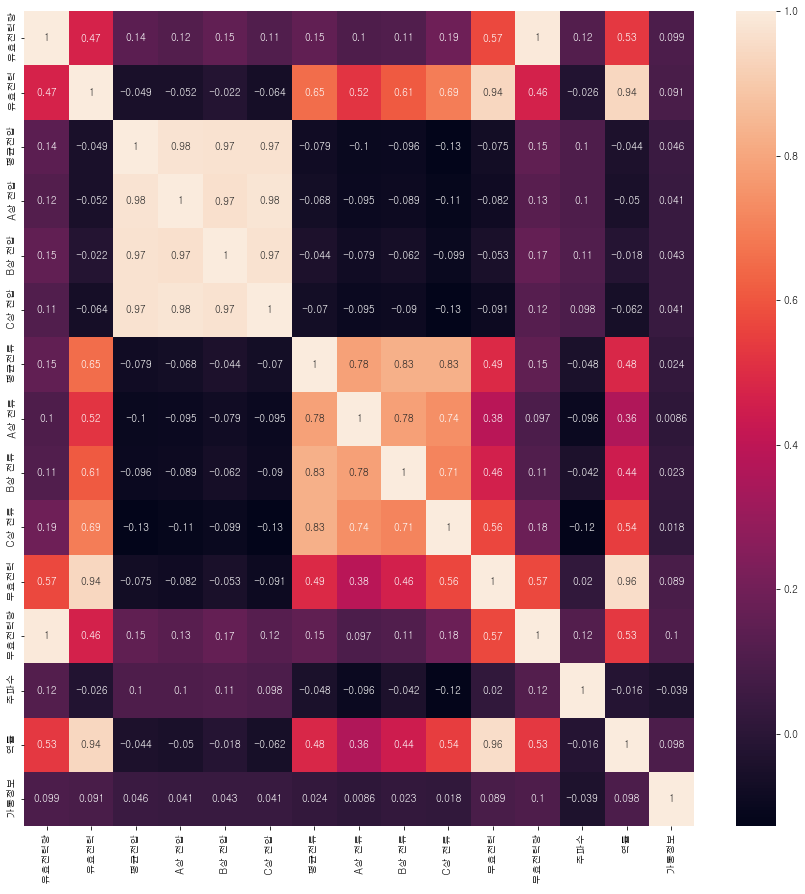

In [32]:
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot = True)

# 피상전력 만들어주기
# 가장 이상적인 경우 : 피상전력과 유효전력이 같아지는 것(역률이 1이 되는 것)
# 한전에서 역률을 90% 기준으로 높은경우에는 매 1%당 기본요금의 0.2% 감액
# 낮은 경우에는 1%당 기본요금의 0.2% 가액하여 관리
# 전압 그래프 그리기

In [33]:
df

,유효전력량,유효전력,평균전압,A상 전압,B상 전압,C상 전압,평균전류,A상 전류,B상 전류,C상 전류,무효전력,무효전력량,주파수,역률,Time,가동정보
0,3645.8999,3.712,383.0131,384.1069,383.7635,383.5443,7.3438,7.8107,6.4319,7.8274,-1.672,1692.0000,60.0000,78.4390,2021-01-29 15:15:00,1
1,3650.6001,5.472,379.9483,381.9691,377.4947,379.3507,9.3125,9.0848,9.5962,9.2529,-1.296,1693.4000,59.7500,86.2309,2021-01-29 16:15:00,0
2,3650.6001,5.472,379.9483,381.9691,377.4947,379.3507,9.3125,9.0848,9.5962,9.2529,-1.296,1693.4000,59.7500,86.2309,2021-01-29 16:15:00,1
3,3655.3000,4.160,388.4655,391.3470,386.6907,388.7793,7.6250,7.8083,7.1990,7.9165,-1.768,1695.0000,59.7500,76.6392,2021-01-29 17:15:00,0
4,3680.6001,5.696,394.6171,395.7317,393.2461,394.9729,9.1250,9.3709,8.5793,9.4666,-1.520,1703.9000,60.0743,90.9466,2021-01-29 22:45:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,7840.7998,4.256,394.8384,396.4203,394.7697,395.2326,6.7188,7.0228,5.4660,7.6914,-1.104,3933.8999,59.7500,84.2658,2021-04-12 23:15:00,1
699,7841.7998,4.832,399.1934,399.3683,397.9555,396.1529,8.2500,7.9906,6.4948,9.4033,-0.988,3934.3000,60.1856,84.2706,2021-04-12 23:30:00,2
700,7841.7998,4.832,399.1934,399.3683,397.9555,396.1529,8.2500,7.9906,6.4948,9.4033,-0.988,3934.3000,60.1856,84.2706,2021-04-12 23:30:00,1
701,7842.7998,3.872,395.2077,396.7956,395.5617,395.7938,6.2813,6.2798,6.2066,6.4005,-1.208,3934.6001,60.1432,90.0149,2021-04-12 23:45:00,2


In [34]:
import math
df['피상전력'] = 0
for i in range(703):
    df['피상전력'][i] = math.sqrt(float(df[' 유효전력'][i])**2 + (df[' 무효전력'][i])**2)

In [35]:
df

,유효전력량,유효전력,평균전압,A상 전압,B상 전압,C상 전압,평균전류,A상 전류,B상 전류,C상 전류,무효전력,무효전력량,주파수,역률,Time,가동정보,피상전력
0,3645.8999,3.712,383.0131,384.1069,383.7635,383.5443,7.3438,7.8107,6.4319,7.8274,-1.672,1692.0000,60.0000,78.4390,2021-01-29 15:15:00,1,4
1,3650.6001,5.472,379.9483,381.9691,377.4947,379.3507,9.3125,9.0848,9.5962,9.2529,-1.296,1693.4000,59.7500,86.2309,2021-01-29 16:15:00,0,5
2,3650.6001,5.472,379.9483,381.9691,377.4947,379.3507,9.3125,9.0848,9.5962,9.2529,-1.296,1693.4000,59.7500,86.2309,2021-01-29 16:15:00,1,5
3,3655.3000,4.160,388.4655,391.3470,386.6907,388.7793,7.6250,7.8083,7.1990,7.9165,-1.768,1695.0000,59.7500,76.6392,2021-01-29 17:15:00,0,4
4,3680.6001,5.696,394.6171,395.7317,393.2461,394.9729,9.1250,9.3709,8.5793,9.4666,-1.520,1703.9000,60.0743,90.9466,2021-01-29 22:45:00,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,7840.7998,4.256,394.8384,396.4203,394.7697,395.2326,6.7188,7.0228,5.4660,7.6914,-1.104,3933.8999,59.7500,84.2658,2021-04-12 23:15:00,1,4
699,7841.7998,4.832,399.1934,399.3683,397.9555,396.1529,8.2500,7.9906,6.4948,9.4033,-0.988,3934.3000,60.1856,84.2706,2021-04-12 23:30:00,2,4
700,7841.7998,4.832,399.1934,399.3683,397.9555,396.1529,8.2500,7.9906,6.4948,9.4033,-0.988,3934.3000,60.1856,84.2706,2021-04-12 23:30:00,1,4
701,7842.7998,3.872,395.2077,396.7956,395.5617,395.7938,6.2813,6.2798,6.2066,6.4005,-1.208,3934.6001,60.1432,90.0149,2021-04-12 23:45:00,2,4


<AxesSubplot:>

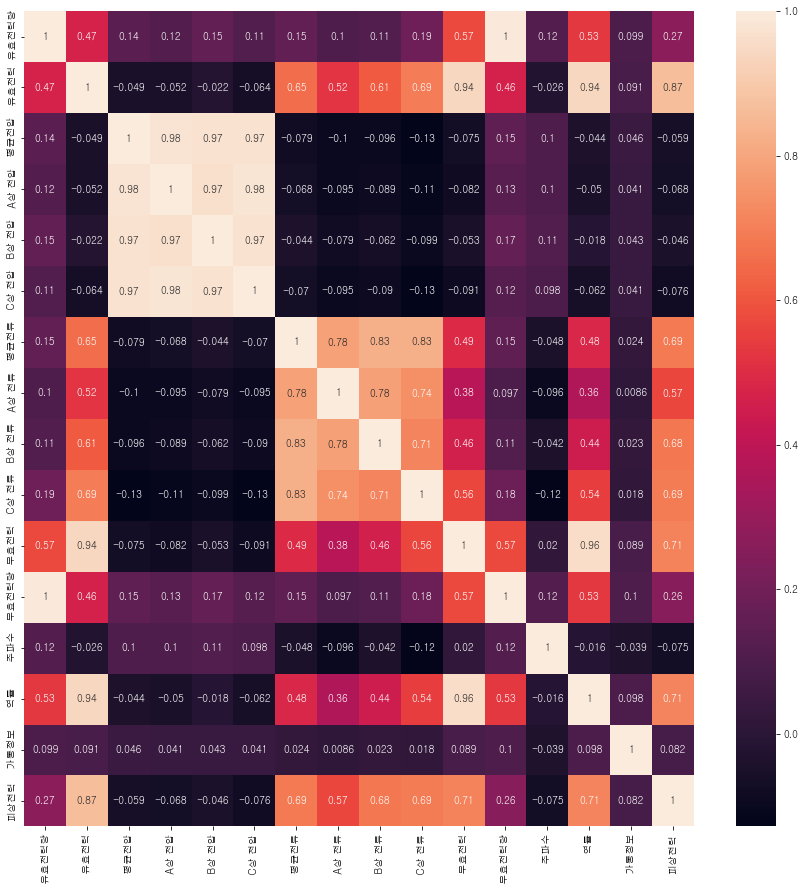

In [36]:
corr = df.corr(method = 'pearson')
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot = True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 703 entries, 0 to 702
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0    유효전력량  703 non-null    float64       
 1    유효전력   703 non-null    float64       
 2    평균전압   703 non-null    float64       
 3    A상 전압  703 non-null    float64       
 4    B상 전압  703 non-null    float64       
 5    C상 전압  703 non-null    float64       
 6    평균전류   703 non-null    float64       
 7    A상 전류  703 non-null    float64       
 8    B상 전류  703 non-null    float64       
 9    C상 전류  703 non-null    float64       
 10   무효전력   703 non-null    float64       
 11   무효전력량  703 non-null    float64       
 12   주파수    703 non-null    float64       
 13   역률     703 non-null    float64       
 14  Time    703 non-null    datetime64[ns]
 15   가동정보   703 non-null    int64         
 16  피상전력    703 non-null    int64         
dtypes: datetime64[ns](1), float64(14), int64(2)
memory usa

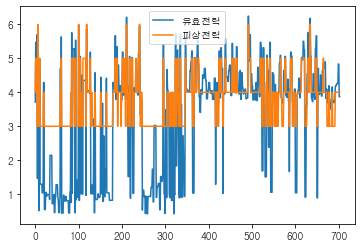

In [38]:
plt.plot(df[[' 유효전력']], label = '유효전력')
plt.plot(df[['피상전력']], label = '피상전력')
plt.legend()

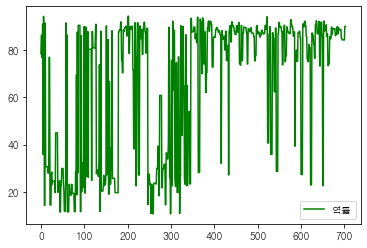

In [39]:
plt.plot(df[[' 역률']], label = '역률', color = 'g')
plt.legend()

# 6/12

In [40]:
df

,유효전력량,유효전력,평균전압,A상 전압,B상 전압,C상 전압,평균전류,A상 전류,B상 전류,C상 전류,무효전력,무효전력량,주파수,역률,Time,가동정보,피상전력
0,3645.8999,3.712,383.0131,384.1069,383.7635,383.5443,7.3438,7.8107,6.4319,7.8274,-1.672,1692.0000,60.0000,78.4390,2021-01-29 15:15:00,1,4
1,3650.6001,5.472,379.9483,381.9691,377.4947,379.3507,9.3125,9.0848,9.5962,9.2529,-1.296,1693.4000,59.7500,86.2309,2021-01-29 16:15:00,0,5
2,3650.6001,5.472,379.9483,381.9691,377.4947,379.3507,9.3125,9.0848,9.5962,9.2529,-1.296,1693.4000,59.7500,86.2309,2021-01-29 16:15:00,1,5
3,3655.3000,4.160,388.4655,391.3470,386.6907,388.7793,7.6250,7.8083,7.1990,7.9165,-1.768,1695.0000,59.7500,76.6392,2021-01-29 17:15:00,0,4
4,3680.6001,5.696,394.6171,395.7317,393.2461,394.9729,9.1250,9.3709,8.5793,9.4666,-1.520,1703.9000,60.0743,90.9466,2021-01-29 22:45:00,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,7840.7998,4.256,394.8384,396.4203,394.7697,395.2326,6.7188,7.0228,5.4660,7.6914,-1.104,3933.8999,59.7500,84.2658,2021-04-12 23:15:00,1,4
699,7841.7998,4.832,399.1934,399.3683,397.9555,396.1529,8.2500,7.9906,6.4948,9.4033,-0.988,3934.3000,60.1856,84.2706,2021-04-12 23:30:00,2,4
700,7841.7998,4.832,399.1934,399.3683,397.9555,396.1529,8.2500,7.9906,6.4948,9.4033,-0.988,3934.3000,60.1856,84.2706,2021-04-12 23:30:00,1,4
701,7842.7998,3.872,395.2077,396.7956,395.5617,395.7938,6.2813,6.2798,6.2066,6.4005,-1.208,3934.6001,60.1432,90.0149,2021-04-12 23:45:00,2,4


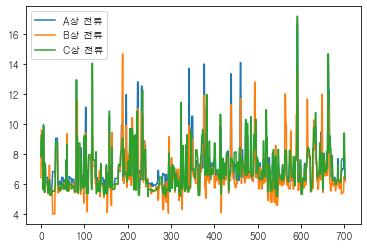

In [41]:
plt.plot(df[[' A상 전류']], label = 'A상 전류')
plt.plot(df[[' B상 전류']], label = 'B상 전류')
plt.plot(df[[' C상 전류']], label = 'C상 전류')
plt.legend()

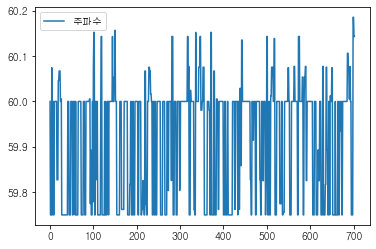

In [42]:
plt.plot(df[[' 주파수']], label = '주파수')
plt.legend()

In [43]:
df['피상전력'].value_counts()

3    290
4    289
5    112
6     12
Name: 피상전력, dtype: int64

In [44]:
df_big = df[df[' 역률'] >=90]
df_small = df[df[' 역률'] <90]

In [45]:
df_big

,유효전력량,유효전력,평균전압,A상 전압,B상 전압,C상 전압,평균전류,A상 전류,B상 전류,C상 전류,무효전력,무효전력량,주파수,역률,Time,가동정보,피상전력
4,3680.6001,5.696,394.6171,395.7317,393.2461,394.9729,9.1250,9.3709,8.5793,9.4666,-1.520,1703.9000,60.0743,90.9466,2021-01-29 22:45:00,0,5
6,3776.3999,5.952,386.0307,388.7281,387.9287,387.7765,9.6875,9.8499,9.3212,9.9648,-1.072,1738.7000,60.0000,94.2147,2021-02-01 11:15:00,0,6
10,3826.1001,4.992,394.1570,394.5967,392.4120,394.0804,7.3750,7.3922,7.3631,7.4125,-1.328,1755.8000,60.0000,91.3854,2021-02-01 22:00:00,0,5
58,4463.6001,4.704,400.2419,401.1402,398.2563,400.3001,7.5000,7.5094,7.4120,7.6209,-1.376,2032.3000,59.7500,91.4813,2021-02-09 23:15:00,0,4
86,5163.1001,5.280,382.1895,385.5674,383.6542,382.0643,8.3750,8.4659,8.4557,8.7233,-1.288,2307.3999,60.0000,90.4270,2021-02-22 14:00:00,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,7803.6001,4.704,384.3479,386.6642,385.2710,385.4802,7.9688,8.0530,7.6988,7.8478,-1.104,3918.6001,59.7500,92.2398,2021-04-12 13:30:00,2,4
653,7803.6001,4.704,384.3479,386.6642,385.2710,385.4802,7.9688,8.0530,7.6988,7.8478,-1.104,3918.6001,59.7500,92.2398,2021-04-12 13:30:00,1,4
658,7806.8999,4.512,382.2081,382.3383,382.8273,383.0337,7.4063,7.2809,7.4972,6.7916,-1.160,3919.5000,60.0000,90.6678,2021-04-12 14:15:00,1,4
701,7842.7998,3.872,395.2077,396.7956,395.5617,395.7938,6.2813,6.2798,6.2066,6.4005,-1.208,3934.6001,60.1432,90.0149,2021-04-12 23:45:00,2,4


In [46]:
df_big[' 가동정보'].value_counts()

1     38
2     26
99    18
0     11
Name:  가동정보, dtype: int64

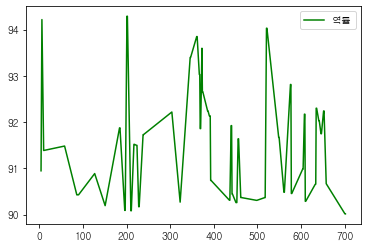

In [47]:
plt.plot(df_big[[' 역률']], label = '역률', color = 'g')
plt.legend()

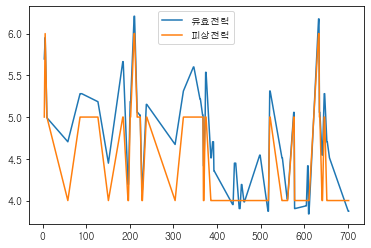

In [48]:
plt.plot(df_big[[' 유효전력']], label = '유효전력')
plt.plot(df_big[['피상전력']], label = '피상전력')
plt.legend()

In [49]:
df_small

,유효전력량,유효전력,평균전압,A상 전압,B상 전압,C상 전압,평균전류,A상 전류,B상 전류,C상 전류,무효전력,무효전력량,주파수,역률,Time,가동정보,피상전력
0,3645.8999,3.712,383.0131,384.1069,383.7635,383.5443,7.3438,7.8107,6.4319,7.8274,-1.672,1692.0000,60.0000,78.4390,2021-01-29 15:15:00,1,4
1,3650.6001,5.472,379.9483,381.9691,377.4947,379.3507,9.3125,9.0848,9.5962,9.2529,-1.296,1693.4000,59.7500,86.2309,2021-01-29 16:15:00,0,5
2,3650.6001,5.472,379.9483,381.9691,377.4947,379.3507,9.3125,9.0848,9.5962,9.2529,-1.296,1693.4000,59.7500,86.2309,2021-01-29 16:15:00,1,5
3,3655.3000,4.160,388.4655,391.3470,386.6907,388.7793,7.6250,7.8083,7.1990,7.9165,-1.768,1695.0000,59.7500,76.6392,2021-01-29 17:15:00,0,4
5,3682.7000,1.464,401.6828,402.0347,401.0969,401.1077,5.7813,6.0350,5.6622,5.6330,-3.472,1704.9000,59.7500,35.8349,2021-01-29 23:15:00,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,7840.7998,4.256,394.8384,396.4203,394.7697,395.2326,6.7188,7.0228,5.4660,7.6914,-1.104,3933.8999,59.7500,84.2658,2021-04-12 23:15:00,1,4
697,7840.7998,4.256,394.8384,396.4203,394.7697,395.2326,6.7188,7.0228,5.4660,7.6914,-1.104,3933.8999,59.7500,84.2658,2021-04-12 23:15:00,2,4
698,7840.7998,4.256,394.8384,396.4203,394.7697,395.2326,6.7188,7.0228,5.4660,7.6914,-1.104,3933.8999,59.7500,84.2658,2021-04-12 23:15:00,1,4
699,7841.7998,4.832,399.1934,399.3683,397.9555,396.1529,8.2500,7.9906,6.4948,9.4033,-0.988,3934.3000,60.1856,84.2706,2021-04-12 23:30:00,2,4


In [50]:
df_small[' 가동정보'].value_counts()

1     267
2     143
0     111
99     89
Name:  가동정보, dtype: int64

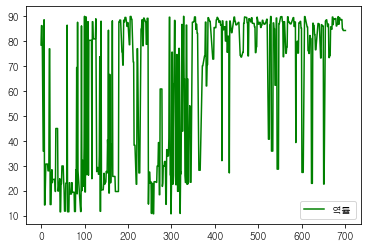

In [51]:
plt.plot(df_small[[' 역률']], label = '역률', color = 'g')
plt.legend()

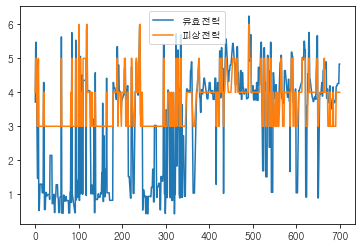

In [52]:
plt.plot(df_small[[' 유효전력']], label = '유효전력')
plt.plot(df_small[['피상전력']], label = '피상전력')
plt.legend()

# 가동정보 알 수 있는 모델 구현

In [53]:
df

,유효전력량,유효전력,평균전압,A상 전압,B상 전압,C상 전압,평균전류,A상 전류,B상 전류,C상 전류,무효전력,무효전력량,주파수,역률,Time,가동정보,피상전력
0,3645.8999,3.712,383.0131,384.1069,383.7635,383.5443,7.3438,7.8107,6.4319,7.8274,-1.672,1692.0000,60.0000,78.4390,2021-01-29 15:15:00,1,4
1,3650.6001,5.472,379.9483,381.9691,377.4947,379.3507,9.3125,9.0848,9.5962,9.2529,-1.296,1693.4000,59.7500,86.2309,2021-01-29 16:15:00,0,5
2,3650.6001,5.472,379.9483,381.9691,377.4947,379.3507,9.3125,9.0848,9.5962,9.2529,-1.296,1693.4000,59.7500,86.2309,2021-01-29 16:15:00,1,5
3,3655.3000,4.160,388.4655,391.3470,386.6907,388.7793,7.6250,7.8083,7.1990,7.9165,-1.768,1695.0000,59.7500,76.6392,2021-01-29 17:15:00,0,4
4,3680.6001,5.696,394.6171,395.7317,393.2461,394.9729,9.1250,9.3709,8.5793,9.4666,-1.520,1703.9000,60.0743,90.9466,2021-01-29 22:45:00,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,7840.7998,4.256,394.8384,396.4203,394.7697,395.2326,6.7188,7.0228,5.4660,7.6914,-1.104,3933.8999,59.7500,84.2658,2021-04-12 23:15:00,1,4
699,7841.7998,4.832,399.1934,399.3683,397.9555,396.1529,8.2500,7.9906,6.4948,9.4033,-0.988,3934.3000,60.1856,84.2706,2021-04-12 23:30:00,2,4
700,7841.7998,4.832,399.1934,399.3683,397.9555,396.1529,8.2500,7.9906,6.4948,9.4033,-0.988,3934.3000,60.1856,84.2706,2021-04-12 23:30:00,1,4
701,7842.7998,3.872,395.2077,396.7956,395.5617,395.7938,6.2813,6.2798,6.2066,6.4005,-1.208,3934.6001,60.1432,90.0149,2021-04-12 23:45:00,2,4


In [54]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [55]:
yt=np.array(df[' 가동정보'])
xt=df.drop(['Time', ' 가동정보', '피상전력'], axis=1)
xt=np.array(xt)

In [56]:
scaler=MinMaxScaler()
xt=scaler.fit_transform(xt)

In [57]:
xtrain,xtest,ytrain,ytest=train_test_split(xt, yt, test_size=0.2, random_state=42)

In [58]:
scores = []
for thisC in [*range(1,100)]:
    svc=SVC(kernel='linear',C=thisC)
    model=svc.fit(xtrain,ytrain)
    scoreTrain=model.score(xtrain,ytrain)
    scoreTest=model.score(xtest,ytest)
    print("선형 SVM : C:{}, training score:{:2f}, test score:{:2f}".format
          (thisC,scoreTrain, scoreTest))
    scores.append([scoreTrain, scoreTest])

선형 SVM : C:1, training score:0.428826, test score:0.453901
선형 SVM : C:2, training score:0.428826, test score:0.453901
선형 SVM : C:3, training score:0.428826, test score:0.453901
선형 SVM : C:4, training score:0.428826, test score:0.453901
선형 SVM : C:5, training score:0.428826, test score:0.453901
선형 SVM : C:6, training score:0.428826, test score:0.453901
선형 SVM : C:7, training score:0.428826, test score:0.453901
선형 SVM : C:8, training score:0.428826, test score:0.453901
선형 SVM : C:9, training score:0.434164, test score:0.453901
선형 SVM : C:10, training score:0.434164, test score:0.453901
선형 SVM : C:11, training score:0.439502, test score:0.453901
선형 SVM : C:12, training score:0.441281, test score:0.453901
선형 SVM : C:13, training score:0.439502, test score:0.468085
선형 SVM : C:14, training score:0.444840, test score:0.468085
선형 SVM : C:15, training score:0.455516, test score:0.475177
선형 SVM : C:16, training score:0.459075, test score:0.482270
선형 SVM : C:17, training score:0.460854, test scor

<AxesSubplot:>

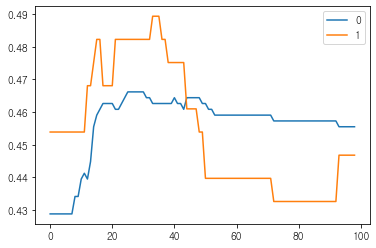

In [59]:
pd.DataFrame(scores).plot()

In [60]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

model=SVC(kernel='linear', C=20).fit(xtrain,ytrain)
scores=cross_val_score(model, xtrain, ytrain, cv=5)
print("CV 점수 : " +str(scores))
st_scores=cross_val_score(model, xtrain, ytrain,cv=StratifiedKFold(5, random_state=10, shuffle=True))
print("StratifiedKFold CV 점수 : " +str(st_scores))
print()
print("CV 평균점수 : " +str(scores.mean()))
print("StratifiedKFold CV 평균점수 : " +str(st_scores.mean()))

CV 점수 : [0.46017699 0.4159292  0.41964286 0.42857143 0.42857143]
StratifiedKFold CV 점수 : [0.42477876 0.39823009 0.44642857 0.42857143 0.42857143]

CV 평균점수 : 0.4305783817951959
StratifiedKFold CV 평균점수 : 0.4253160556257901


In [61]:
from sklearn.svm import LinearSVC

for thisC in [1,3,5,10,40,60,80,100]:
    model2=LinearSVC(C=thisC).fit(xtrain,ytrain)
    scoretrain=model2.score(xtrain,ytrain)
    scoretest=model2.score(xtest,ytest)
    print("선형 SVM : C:{}, training score:{:2f}, test score:{:2f} \n".format(thisC,scoretrain, scoretest)) 

선형 SVM : C:1, training score:0.448399, test score:0.460993 

선형 SVM : C:3, training score:0.451957, test score:0.439716 

선형 SVM : C:5, training score:0.451957, test score:0.453901 

선형 SVM : C:10, training score:0.451957, test score:0.446809 

선형 SVM : C:40, training score:0.450178, test score:0.460993 

선형 SVM : C:60, training score:0.414591, test score:0.390071 

선형 SVM : C:80, training score:0.448399, test score:0.439716 

선형 SVM : C:100, training score:0.432384, test score:0.453901 



In [62]:
#RBF 커널 SVM, C와 gamma 퍼러미터 사용
for thisGamma in [.1, .25, .5, 1]:
    for thisC in [1,5,10,20,40,100]:
        model3=SVC(kernel="rbf", C=thisC, 
                   gamma=thisGamma).fit(xtrain, ytrain)
        m3train=model3.score(xtrain,ytrain)
        m3test=model3.score(xtest,ytest)
        print("RBF SVM : C:{}, gamma:{},training score:{:2f},test score:{:2f} \n".format(thisC, thisGamma, m3train, m3test))

RBF SVM : C:1, gamma:0.1,training score:0.428826,test score:0.453901 

RBF SVM : C:5, gamma:0.1,training score:0.459075,test score:0.475177 

RBF SVM : C:10, gamma:0.1,training score:0.462633,test score:0.475177 

RBF SVM : C:20, gamma:0.1,training score:0.460854,test score:0.482270 

RBF SVM : C:40, gamma:0.1,training score:0.466192,test score:0.475177 

RBF SVM : C:100, gamma:0.1,training score:0.467972,test score:0.482270 

RBF SVM : C:1, gamma:0.25,training score:0.453737,test score:0.475177 

RBF SVM : C:5, gamma:0.25,training score:0.462633,test score:0.475177 

RBF SVM : C:10, gamma:0.25,training score:0.464413,test score:0.475177 

RBF SVM : C:20, gamma:0.25,training score:0.466192,test score:0.475177 

RBF SVM : C:40, gamma:0.25,training score:0.475089,test score:0.460993 

RBF SVM : C:100, gamma:0.25,training score:0.494662,test score:0.432624 

RBF SVM : C:1, gamma:0.5,training score:0.462633,test score:0.475177 

RBF SVM : C:5, gamma:0.5,training score:0.469751,test score:0

In [63]:
from sklearn.model_selection import GridSearchCV
param={'C':[1,5,10,20,40,100],
      'gamma':[.1, .25, .5, 1]}
GS=GridSearchCV(SVC(kernel='rbf'),param, cv=5)
GS.fit(xtrain, ytrain)
print(GS.best_params_)
print(GS.best_score_)

{'C': 1, 'gamma': 0.5}
0.4537294563843237


In [64]:
test=cnc_df.drop(['Time'],axis=1)
test.head()
testmat=np.array(test)
test=scaler.fit_transform(test)
#test(DF -> array)
model=SVC(kernel='rbf', C=5, gamma=.1).fit(xtrain, ytrain)

In [69]:
prediction=model.predict(test)
pred=pd.DataFrame(prediction)
pred.head(20)

,0
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,0
8,0
9,0
